Accuracy: 0.9


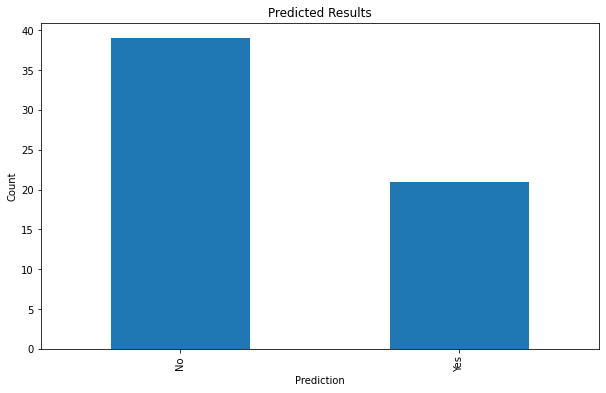

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Step 1: Load and preprocess the dataset
df = pd.read_csv("C:/Users/Admin/Desktop/python/new/company_hire_dataset.csv")

# Add the target column which is named "call_for_interview"
target_column = "call_for_interview"

# Step 2: Determine the three best columns using chi-square test
# Perform chi-square test on each column and select the three with the highest scores
chi_scores = {}
for column in df.columns:
    if column != target_column:
        observed = pd.crosstab(df[column], df[target_column])
        chi2, p, _, _ = chi2_contingency(observed)
        chi_scores[column] = chi2

# Sort the columns in descending order based on chi-square scores
selected_columns = ['years_of_experience', 'functional_competency_score', 'top1_skills_score', 'top2_skills_score', 'top3_skills_score', 'behavior_competency_score', 'top1_behavior_skill_score', 'top2_behavior_skill_score', 'top3_behavior_skill_score']

# Step 3: Split the dataset into training and testing sets
X = df[selected_columns]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predict the outcomes and calculate accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Add the predicted results to the dataset
df["predicted_result"] = np.nan
df.loc[X_test.index, "predicted_result"] = y_pred

# Step 7: Visualize the data using a preferred chart or graph
# Here's an example using a bar plot
plt.figure(figsize=(10, 6))
df["predicted_result"].value_counts().plot(kind="bar")
plt.title("Predicted Results")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.show()